In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Importing test and train samples

In [2]:
train = pd.read_csv('datasets/train.csv')
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [3]:
test_df = pd.read_csv('datasets/test.csv')
prices_test = pd.read_csv('datasets/sample_submission.csv')
test = pd.merge(test_df, prices_test, on='id')
test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,...,0,0,0,1,10,1,0,14,1,7118500.41
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,...,1,1,0,2,11,0,1,12,1,7118500.41
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,...,11,4,0,10,21,0,10,71,11,7118500.41
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,...,1,2,0,0,10,0,0,2,0,7118500.41
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,...,1,1,0,2,12,0,1,11,1,7118500.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,...,28,1,1,8,39,2,3,75,12,7118500.41
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,...,2,1,0,0,10,0,0,0,0,7118500.41
7659,38133,2016-05-30,41.08,1.0,12,1,1,1.0,1,1.0,...,371,141,26,150,249,2,105,203,13,7118500.41
7660,38134,2016-05-30,34.80,19.8,8,9,5,1977.0,1,6.4,...,7,2,0,5,11,0,2,43,10,7118500.41


In [4]:
train.shape

(30471, 292)

In [5]:
df = train.append(test)
df

C:\Users\User\AppData\Local\Temp\ipykernel_13688\1289463835.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43.00,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000.00
1,2,2011-08-23,34.00,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000.00
2,3,2011-08-27,43.00,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000.00
3,4,2011-09-01,89.00,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000.00
4,5,2011-09-05,77.00,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,...,28,1,1,8,39,2,3,75,12,7118500.41
7658,38132,2016-05-28,54.09,NaN,14.0,0.0,1.0,NaN,2.0,0.0,...,2,1,0,0,10,0,0,0,0,7118500.41
7659,38133,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,7118500.41
7660,38134,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,...,7,2,0,5,11,0,2,43,10,7118500.41


## Deleting null values


In [6]:
print(f"Percent of rows after deleting null values: " + "{:.2f}%".format(df.shape[0] / df.dropna().shape[0]))

Percent of rows after deleting null values: 4.51%


In [7]:
nullValuesCount = df.isnull().sum().sort_values(ascending=False)
nullValuesCount = nullValuesCount[nullValuesCount > 0]
nullValuesPercent = nullValuesCount / df.shape[0]

### Percentage of null values per column visualization

Text(0.5, 1.0, 'Percent of null values in column  (%)')

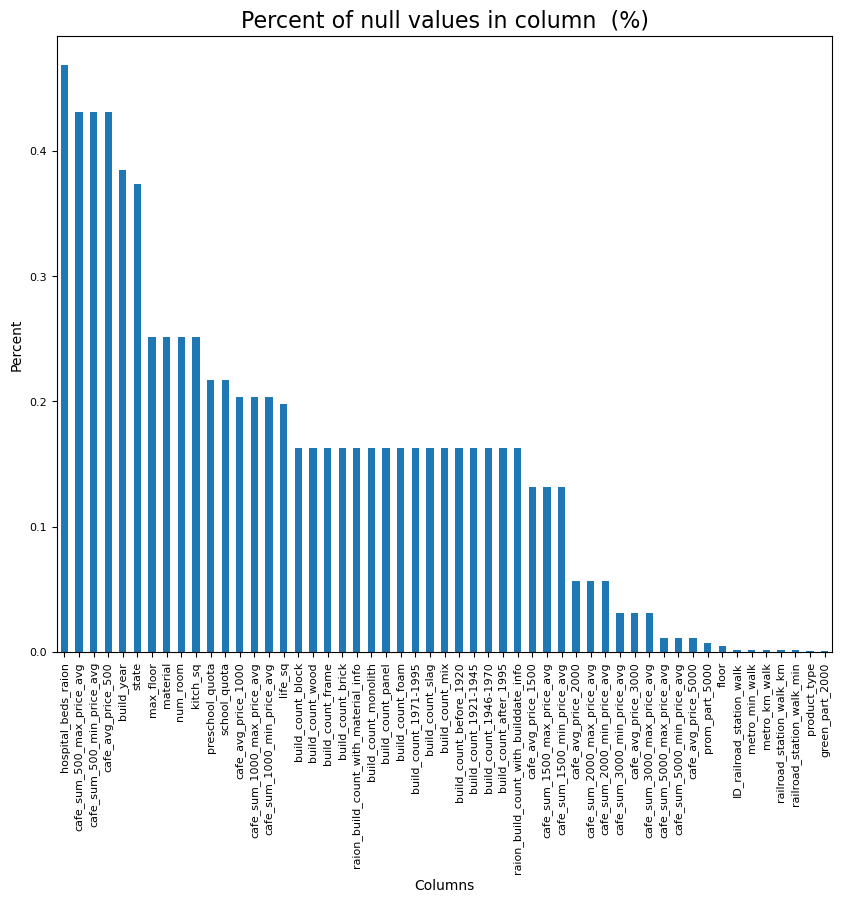

In [8]:
nullValuesPercent.plot(kind="bar", figsize = (10,8), fontsize = 8)
plt.xlabel("Columns", fontsize = 10)
plt.ylabel("Percent", fontsize = 10)
plt.title("Percent of null values in column  (%)", fontsize = 16)

In [9]:
nullValuesPercent

hospital_beds_raion                      0.468335
cafe_sum_500_max_price_avg               0.431123
cafe_sum_500_min_price_avg               0.431123
cafe_avg_price_500                       0.431123
build_year                               0.384287
state                                    0.373771
max_floor                                0.251016
material                                 0.251016
num_room                                 0.251016
kitch_sq                                 0.251016
preschool_quota                          0.217240
school_quota                             0.217135
cafe_avg_price_1000                      0.203131
cafe_sum_1000_max_price_avg              0.203131
cafe_sum_1000_min_price_avg              0.203131
life_sq                                  0.198227
build_count_block                        0.162825
build_count_wood                         0.162825
build_count_frame                        0.162825
build_count_brick                        0.162825


In [10]:
count_uninformative = nullValuesPercent[nullValuesPercent > 0.4]
print(f"Count of uninformative values with a lot of null values: {count_uninformative.shape[0]}")

Count of uninformative values with a lot of null values: 4


In [11]:
df.drop(columns=count_uninformative.index, axis=1, inplace=True)

In [12]:
df.shape

(38133, 288)

#### Filling null values
Filling numeric columns with median value of column, categorical - with "unknown" value

In [13]:
def fill_nulls(df, columns):
    for column in columns:
        column_type = df[column].dtype 
        if column_type == 'object':
            df[column].fillna('unknown', inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)
    return df

In [14]:
columns = nullValuesPercent.index[4:]
columns

Index(['build_year', 'state', 'max_floor', 'material', 'num_room', 'kitch_sq',
       'preschool_quota', 'school_quota', 'cafe_avg_price_1000',
       'cafe_sum_1000_max_price_avg', 'cafe_sum_1000_min_price_avg', 'life_sq',
       'build_count_block', 'build_count_wood', 'build_count_frame',
       'build_count_brick', 'raion_build_count_with_material_info',
       'build_count_monolith', 'build_count_panel', 'build_count_foam',
       'build_count_1971-1995', 'build_count_slag', 'build_count_mix',
       'build_count_before_1920', 'build_count_1921-1945',
       'build_count_1946-1970', 'build_count_after_1995',
       'raion_build_count_with_builddate_info', 'cafe_avg_price_1500',
       'cafe_sum_1500_max_price_avg', 'cafe_sum_1500_min_price_avg',
       'cafe_avg_price_2000', 'cafe_sum_2000_max_price_avg',
       'cafe_sum_2000_min_price_avg', 'cafe_sum_3000_min_price_avg',
       'cafe_avg_price_3000', 'cafe_sum_3000_max_price_avg',
       'cafe_sum_5000_max_price_avg', 'cafe_sum_

#### Checking for null values

In [15]:
df = fill_nulls(df,columns)
df.isnull().sum().sum()

0

## Dropping "id" column

In [16]:
df.drop(columns=['id'], inplace=True)

## Importing of macro economy dataset

In [17]:
macro = pd.read_csv('datasets/macro.csv')

In [18]:
macro

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the correctness of CPI data in the Macro dataset

#### Extracting year from timestamp

In [19]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [20]:
macro['year'] = macro['timestamp'].dt.year

#### Checking data for every year and month

In [21]:
year = 2010

for i in range(7): 
    print(year + i)
    print(macro[macro.year == year + i]['cpi'].value_counts(dropna=False))
    print('-------------------------------------')

2010
NaN      31
317.7    31
320.7    31
323.6    31
324.8    31
329.3    31
333.6    31
319.8    30
322.3    30
326.6    30
330.9    30
315.1    28
Name: cpi, dtype: int64
-------------------------------------
2011
354.0    62
353.2    60
337.2    31
347.9    31
351.5    31
353.0    31
356.2    31
350.0    30
354.7    30
345.2    28
Name: cpi, dtype: int64
-------------------------------------
2012
357.8    31
360.9    31
364.1    31
369.2    31
373.8    31
376.2    31
379.2    31
363.0    30
366.0    30
374.1    30
377.9    30
359.5    29
Name: cpi, dtype: int64
-------------------------------------
2013
381.2    31
387.1    31
390.4    31
394.7    31
397.9    31
399.3    31
403.9    31
388.5    30
393.0    30
398.5    30
401.6    30
384.9    28
Name: cpi, dtype: int64
-------------------------------------
2014
405.9    31
411.2    31
419.1    31
425.5    31
427.5    31
431.4    31
440.5    31
415.3    30
422.8    30
428.6    30
434.9    30
408.3    28
Name: cpi, dtype: int64
-------

In [22]:
CPI = macro[['timestamp', 'cpi']]

## Correcting the price by adjusting with CPI

In [23]:
df.rename(columns={'price_doc': 'price'}, inplace=True)

In [24]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [25]:
df['year'] = df['timestamp'].dt.year

#### Checking the values in dataset per year

In [26]:
df.groupby('year').mean().index

Int64Index([2011, 2012, 2013, 2014, 2015, 2016], dtype='int64', name='year')

#### Adjusting price with CPI

In [27]:
df = pd.merge(df, CPI, on='timestamp')

In [28]:
df['price'] = (df['price'] / df['cpi'] * 100).round(2)

In [29]:
df['price']

0        1652542.37
1        1694915.25
2        1610169.49
3        3708946.77
4        4623853.91
            ...    
38128    1360569.65
38129    1360569.65
38130    1360569.65
38131    1360569.65
38132    1360569.65
Name: price, Length: 38133, dtype: float64

In [30]:
df.drop('cpi', axis=1, inplace=True) 

#### Splitting dataset for train and test samples

In [31]:
train = df[df.timestamp < '2015-07-01']
train

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.0,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.0,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.0,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-01,89.0,50.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,2,1,4,4,0,0,26,3,3708946.77,2011
4,2011-09-05,77.0,77.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,108,17,135,236,2,91,195,14,4623853.91,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,5,0,15,26,1,2,84,6,1511746.68,2015
30467,2015-06-30,86.0,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,128,24,98,182,1,82,171,15,5107252.30,2015
30468,2015-06-30,45.0,30.0,10.0,20.0,1.0,1980.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1424097.85,2015
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,1,1,6,31,1,4,65,7,2757916.24,2015


In [32]:
test = df[df.timestamp >= '2015-07-01']
test

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
30471,2015-07-01,39.00,20.7,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,...,0,0,1,10,1,0,14,1,1451274.29,2015
30472,2015-07-01,79.20,30.0,8.0,17.0,1.0,0.0,3.0,1.0,1.0,...,1,0,2,11,0,1,12,1,1451274.29,2015
30473,2015-07-01,40.50,25.1,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,...,4,0,10,21,0,10,71,11,1451274.29,2015
30474,2015-07-01,62.80,36.0,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,...,2,0,0,10,0,0,2,0,1451274.29,2015
30475,2015-07-01,40.00,40.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1451274.29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
38129,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
38130,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
38131,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


In [33]:
train.price.describe()

count    3.047100e+04
mean     1.730225e+06
std      1.151249e+06
min      2.365184e+04
25%      1.154303e+06
50%      1.527082e+06
75%      1.994163e+06
max      3.051665e+07
Name: price, dtype: float64

## Vizualization price and time dependency

In [34]:
test_df = df.copy()

In [35]:
test_df.set_index('timestamp', inplace=True)

In [36]:
def timestampPricePlot(df):
    fig = plt.figure(figsize = (14,8))
    # Create a line plot of the price column
    plt.plot(df['price'])

    # Set the plot title and labels
    plt.title('Price over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Price')

    # Show the plot
    plt.show() 

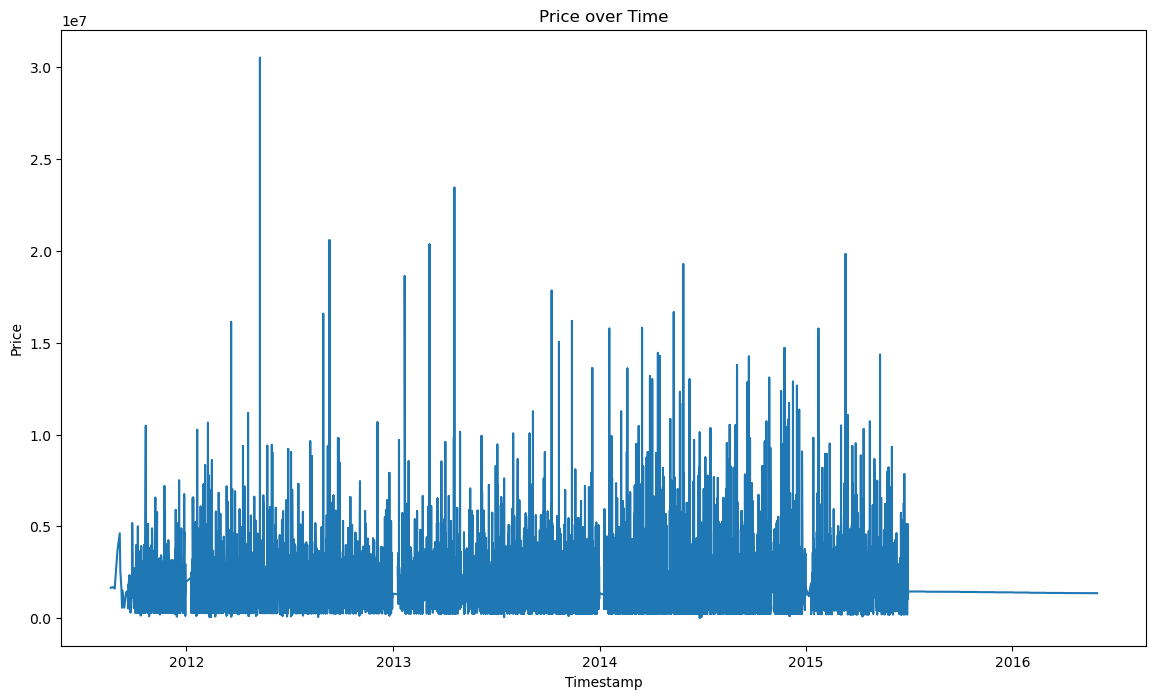

In [37]:
timestampPricePlot(test_df)

#### Conclusion: The constant price at the end of the dataset can be explained by the fact that price in the test sample is constant

## IQR method to find outliers in "price"

In [38]:
q1 = train['price'].quantile(0.25)
q3 = train['price'].quantile(0.75)
iqr = q3 - q1
median = train['price'].median()

In [39]:
lower_bound = median - 1.5*iqr
upper_bound = median + 1.5*iqr
outliers = (train['price'] < lower_bound) | (train['price'] > upper_bound)

In [40]:
train[outliers]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
3,2011-09-01,89.0,50.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,2,1,4,4,0,0,26,3,3708946.77,2011
4,2011-09-05,77.0,77.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,108,17,135,236,2,91,195,14,4623853.91,2011
31,2011-09-27,81.0,46.0,24.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,5,0,10,10,0,1,50,4,5181200.45,2011
58,2011-10-04,75.0,46.0,12.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,12,1,12,28,0,4,97,14,2818696.88,2011
60,2011-10-04,96.0,51.0,16.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,4,6,0,1,24,3,3966005.67,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30434,2015-06-26,76.0,44.0,6.0,12.0,1.0,2006.0,3.0,10.0,3.0,...,31,4,64,100,1,43,120,10,3513789.58,2015
30438,2015-06-26,88.0,58.0,7.0,8.0,2.0,1960.0,3.0,8.0,3.0,...,62,12,51,110,1,54,144,11,4085801.84,2015
30441,2015-06-27,113.0,1.0,26.0,26.0,1.0,2015.0,4.0,1.0,1.0,...,141,26,150,249,2,105,203,13,5115280.90,2015
30456,2015-06-29,52.0,30.0,8.0,14.0,1.0,1992.0,2.0,8.0,2.0,...,4,1,5,7,0,1,42,6,204290.09,2015


In [41]:
train = train[~outliers]
train

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.0,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.0,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.0,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
5,2011-09-06,67.0,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
6,2011-09-08,25.0,14.0,10.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,16,3,38,80,1,27,127,8,1557191.39,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,2015-06-30,52.0,30.0,13.0,17.0,1.0,1980.0,2.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1379071.30,2015
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,5,0,15,26,1,2,84,6,1511746.68,2015
30468,2015-06-30,45.0,30.0,10.0,20.0,1.0,1980.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1424097.85,2015
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,1,1,6,31,1,4,65,7,2757916.24,2015


In [42]:
train.shape

(26465, 288)

In [43]:
def get_train_corr(df):
    train = df[df.timestamp < '2015-07-01']
    return train.corr()

In [44]:
df = pd.concat([train, test], ignore_index=True)
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.00,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.00,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.00,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-06,67.00,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
4,2011-09-08,25.00,14.0,10.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,16,3,38,80,1,27,127,8,1557191.39,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
34123,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
34124,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
34125,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


# Including features

#### Grouping the similar columns using average value counting

In [45]:
def group_cols_by_mean(df, columns, name_col):
    df[name_col] = 0 
    
    for col in columns:
        df[name_col] += df[col]
    
    df[name_col] /= len(columns)
    df.drop(columns=columns, axis=1,inplace=True)

#### Getting the list of highly correlated columns with current column

In [46]:
def high_corr(corr_matrix, column):
    return corr_matrix[column][corr_matrix[column] > 0.6].sort_values(ascending=False)

#### An empty list for including columns

In [47]:
columns = []

## "Square" feature

In [48]:
square_columns = df.columns[df.columns.str.contains('sq$')]

In [49]:
square = df[square_columns]
square

,full_sq,life_sq,kitch_sq
0,43.00,27.0,6.0
1,34.00,19.0,6.0
2,43.00,29.0,6.0
3,67.00,46.0,6.0
4,25.00,14.0,6.0
...,...,...,...
34122,52.20,31.8,9.1
34123,54.09,30.0,0.0
34124,41.08,1.0,1.0
34125,34.80,19.8,6.4


In [50]:
df.corr().price[square_columns]

full_sq     0.150693
life_sq     0.056575
kitch_sq    0.013920
Name: price, dtype: float64

#### Conclusion: include only full_sq

In [51]:
columns.append('full_sq')

#### Dropping outliers

In [52]:
df.full_sq.describe()

count    34127.000000
mean        51.351256
std         34.550678
min          0.000000
25%         38.000000
50%         46.000000
75%         60.060000
max       5326.000000
Name: full_sq, dtype: float64

In [53]:
df = df[(df['full_sq'].quantile(.99) > df['full_sq']) & (df['full_sq'] > df['full_sq'].quantile(.01))]

In [54]:
df.shape

(33362, 288)

## "Number of rooms" feature

In [55]:
df["num_room"].value_counts()

2.0     18640
1.0      9843
3.0      4646
4.0       206
5.0        12
0.0         8
6.0         3
19.0        2
10.0        2
Name: num_room, dtype: int64

#### Droping all rows where number of room is less than 5

In [56]:
df = df[(df["num_room"] < 5) & (df["num_room"] > 0)]

In [57]:
df["num_room"].value_counts()

2.0    18640
1.0     9843
3.0     4646
4.0      206
Name: num_room, dtype: int64

In [58]:
df.shape

(33335, 288)

In [59]:
columns.append('num_room')

## "State of flat" feature

In [60]:
df['state'].value_counts()

2.0     20101
3.0      6498
1.0      6390
4.0       345
33.0        1
Name: state, dtype: int64

#### Dropping all rows where number of room is less than 5

In [61]:
df = df[df.state <= 4]

In [62]:
df.shape

(33334, 288)

In [63]:
columns.append('state')

## "Population" feature

#### Finding outliers using IQR method

In [64]:
def findOutliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    
    lower_bound = median - 1.5*iqr
    upper_bound = median + 1.5*iqr
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

#### Exploration of correlation with column "work all"

In [65]:
corr_matrix = get_train_corr(df)

In [66]:
high_corr(corr_matrix, "work_all")

work_all                             1.000000
work_male                            0.997634
work_female                          0.997572
raion_popul                          0.996833
0_17_all                             0.960266
0_17_male                            0.959638
0_17_female                          0.959243
young_all                            0.958215
young_male                           0.957748
0_13_all                             0.957216
young_female                         0.956903
0_13_male                            0.956823
0_13_female                          0.955687
7_14_male                            0.955323
7_14_all                             0.954848
children_school                      0.954848
children_preschool                   0.954392
0_6_all                              0.954392
0_6_male                             0.953881
0_6_female                           0.953302
7_14_female                          0.951349
ekder_female                      

#### Conclusion: include "work_all" feature


In [67]:
columns.append('work_all')

In [68]:
df.work_all.describe()

count     33334.000000
mean      53012.989200
std       38019.241045
min        1633.000000
25%       13996.000000
50%       52030.000000
75%       77062.000000
max      161290.000000
Name: work_all, dtype: float64

#### Dropping outliers

In [69]:
df[findOutliers(df, 'work_all')]['work_all'].value_counts()

161290    570
Name: work_all, dtype: int64

In [70]:
outliers = findOutliers(df, 'work_all')

In [71]:
df_test = df[~outliers]
df_test

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.00,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.00,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.00,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-06,67.00,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
5,2011-09-09,44.00,44.0,5.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,11,18,1,0,47,4,566251.42,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
34123,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
34124,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
34125,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


In [72]:
df_test.work_all.describe()

count     32764.000000
mean      51129.278537
std       35540.021374
min        1633.000000
25%       13996.000000
50%       51445.000000
75%       75334.000000
max      140182.000000
Name: work_all, dtype: float64

## "Distance" feature

In [73]:
df.columns[df.columns.str.contains('km$')]

Index(['kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
       'railroad_station_walk_km', 'railroad_station_avto_km',
       'public_transport_station_km', 'water_km', 'mkad_km', 'ttk_km',
       'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km',
       'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
       'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km',
       'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km',
       'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km',
       'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhib

In [74]:
distance_columns = ['kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 
       'water_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
       'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km',
       'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km',
       'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km',
       'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhibition_km', 'catering_km']

#### Choosing from distance columns all columns which correlation is above mean value

In [75]:
distance_columns = corr_matrix.price[distance_columns][abs(corr_matrix.price[distance_columns]) > 
                                    abs(corr_matrix.price).mean()].index

#### Grouping all columns into one column "distance_km"

In [76]:
group_cols_by_mean(df, distance_columns, "distance_km")

In [77]:
columns.append("distance_km")

#### Dropping outliers

In [78]:
df['distance_km'].describe()

count    33334.000000
mean         5.323879
std          3.837941
min          1.939995
25%          2.878165
50%          3.838348
75%          6.881090
max         47.721564
Name: distance_km, dtype: float64

In [79]:
outliers = findOutliers(df, 'distance_km')
outliers.shape

(33334,)

In [80]:
df[outliers]['distance_km'].describe()

count    3163.000000
mean       14.011979
std         5.617914
min         9.876663
25%        11.030214
50%        11.793066
75%        13.056448
max        47.721564
Name: distance_km, dtype: float64

#### We have too many outliers. Let's reduce their number

In [81]:
df[outliers][df[outliers]['distance_km'] > 14]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year,distance_km
2212,2012-06-21,81.0,26.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,0,0,3,0,0,0,0,683060.11,2012,18.954827
2451,2012-07-16,51.0,30.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,0,0,6,0,0,3,2,1516793.07,2012,16.893918
2469,2012-07-18,41.0,28.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,0,0,3,0,0,0,0,893824.49,2012,19.033284
2946,2012-08-31,46.0,30.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,0,0,4,0,0,0,1,267522.74,2012,18.831906
3081,2012-09-12,64.0,28.0,6.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,0,0,2,0,0,0,0,801924.62,2012,19.741015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34087,2016-05-18,39.9,30.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,7,0,0,3,2,1360569.65,2016,14.943920
34101,2016-05-21,57.9,36.9,2.0,3.0,1.0,1953.0,3.0,7.8,3.0,...,0,0,2,0,0,0,0,1360569.65,2016,19.803328
34103,2016-05-21,36.5,30.0,13.0,17.0,1.0,1980.0,1.0,0.0,2.0,...,0,0,8,0,0,3,2,1360569.65,2016,15.640672
34106,2016-05-23,36.0,36.0,10.0,17.0,1.0,2015.0,1.0,11.0,1.0,...,0,0,8,0,0,3,2,1360569.65,2016,15.640672


#### Dropping outliers

In [82]:
df = df[df.distance_km <= 14] 

In [83]:
df.shape

(32609, 257)

## "Center" and "mkad distance" features

In [84]:
columns.append('kremlin_km')

In [85]:
columns.append('mkad_km')

In [86]:
df.mkad_km.describe()

count    32609.000000
mean         5.848351
std          4.142769
min          0.013626
25%          2.580435
50%          5.276637
75%          8.134873
max         21.087905
Name: mkad_km, dtype: float64

In [87]:
df.kremlin_km.describe()

count    32609.000000
mean        15.885074
std          7.504655
min          0.072897
25%         10.657392
50%         15.139787
75%         20.665120
max         39.255114
Name: kremlin_km, dtype: float64

## Final dataset

In [95]:
columns.append('price')

In [96]:
heatmap_df = df[columns]

<AxesSubplot:>

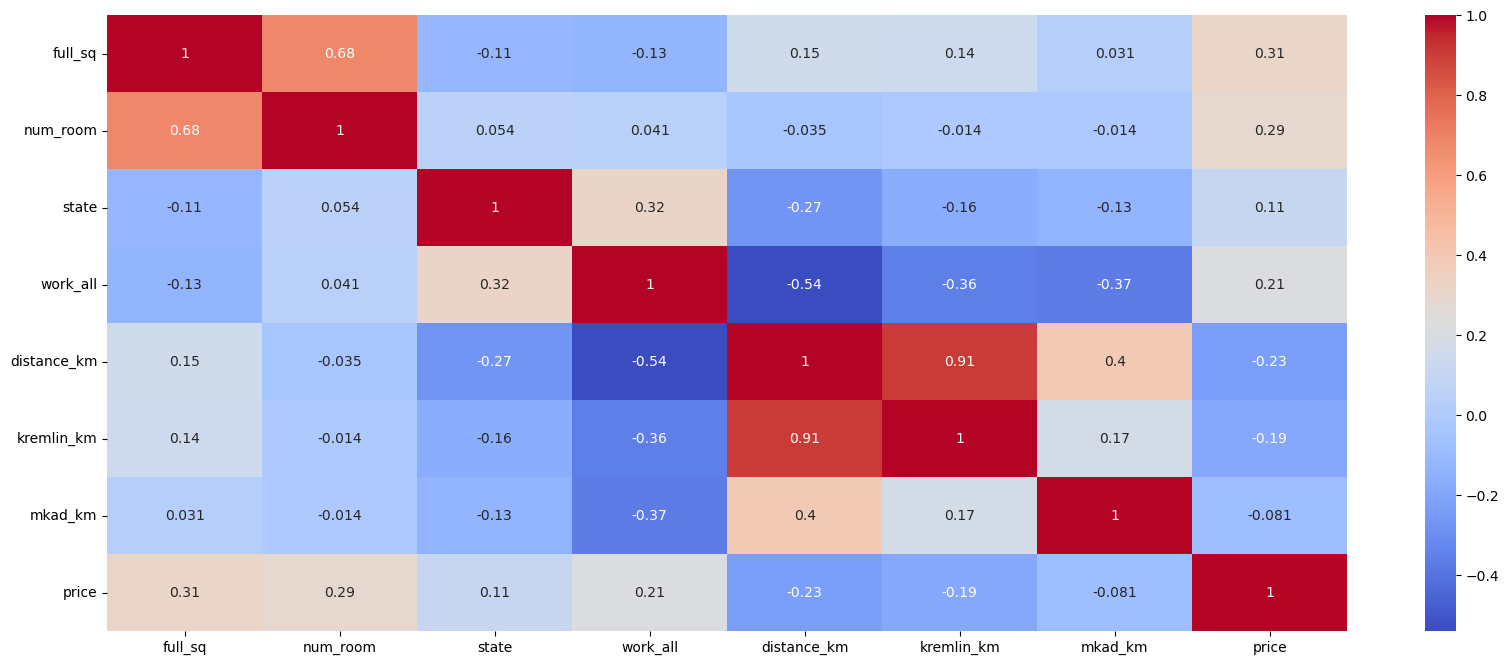

In [97]:
f, ax = plt.subplots(figsize=(20,8))

sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')

## Preparing test and train datasets

In [98]:
columns.append('timestamp')

In [99]:
def getTestDataset(df):
    test = df[df.timestamp >= '2015-07-01']
    test.drop('timestamp', axis=1, inplace=True) 
    return test 

In [100]:
def getTrainDataset(df):
    train = df[df.timestamp < '2015-07-01']
    train.drop('timestamp', axis=1, inplace=True) 
    return train

In [101]:
test = getTestDataset(df[columns])

C:\Users\User\AppData\Local\Temp\ipykernel_13688\3553774952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('timestamp', axis=1, inplace=True)


In [102]:
train = getTrainDataset(df[columns])

C:\Users\User\AppData\Local\Temp\ipykernel_13688\2975833616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('timestamp', axis=1, inplace=True)


# Model training

###Data standartization

In [103]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [104]:
y_train = train['price'].copy()
x_train = train.drop('price', axis=1)

In [105]:
y_test = test['price'].copy()
x_test = test.drop('price', axis=1)

In [106]:
scaler = StandardScaler()

In [107]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [108]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

### Target logarithm

In [109]:
y_train = np.log1p(y_train)

In [110]:
y_test = np.log1p(y_test)

## Training models with numeric columns

### Linear regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [112]:
reg = LinearRegression()

In [113]:
reg.fit(x_train, y_train)

LinearRegression()

In [114]:
y_pred = reg.predict(x_test)

In [115]:
mse = mean_squared_error(y_test, y_pred)

In [116]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.04519704781731377


In [117]:
score = reg.score(x_test, y_test)

In [118]:
print('Score:', score)

Score: -124.97530068654345


### Random forest 

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
forest = RandomForestRegressor()

In [121]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [122]:
y_pred = forest.predict(x_test)

In [123]:
mse = mean_squared_error(y_test, y_pred)

In [124]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.07797507170564713


In [125]:
forest.score(x_test, y_test)

-216.3357238702388

## Regularization model

### Ridge model

In [126]:
from sklearn.linear_model import Ridge

In [127]:
ridge = Ridge(alpha=0.5)

In [128]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [129]:
y_pred = ridge.predict(x_test)

In [130]:
print('Mean Squared Error:',  mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.04519491575585209


In [131]:
print("Ridge regression score:", ridge.score(x_test, y_test))

Ridge regression score: -124.96935810629347


### Lasso model

In [132]:
from sklearn.linear_model import Lasso

In [133]:
lasso = Lasso(alpha=0.5)

In [134]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.5)

In [135]:
y_pred = lasso.predict(x_test)

In [136]:
print('Mean Squared Error:',  mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.0003870874695802186


In [137]:
print("Lasso regression score:", lasso.score(x_test, y_test))

Lasso regression score: -0.07890808641889469


#### Conclusion: the best models from numeric once is Lasso model

# Model with category features

## Analyzing category features

In [138]:
category_col = df.columns[df.dtypes == 'object']
category_col

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [139]:
df[category_col]

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Nizhegorodskoe,no,yes,no,no,yes,no,no,no,no,no,no,no,poor
5,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,Investment,Kon'kovo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory
34123,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
34124,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
34125,Investment,Orehovo-Borisovo Juzhnoe,no,no,no,no,no,no,yes,no,no,no,no,no,poor


In [140]:
df.ecology.value_counts()

poor            8460
no data         8313
good            7714
excellent       4380
satisfactory    3742
Name: ecology, dtype: int64

In [141]:
df.product_type.value_counts()

Investment       20600
OwnerOccupier    11977
unknown             32
Name: product_type, dtype: int64

In [142]:
df.culture_objects_top_25.value_counts()

no     30556
yes     2053
Name: culture_objects_top_25, dtype: int64

In [143]:
df.sub_area.value_counts()

Poselenie Sosenskoe     2002
Poselenie Vnukovskoe    1945
Nekrasovka              1682
Poselenie Moskovskij    1139
Tverskoe                 754
                        ... 
Krasnosel'skoe            27
Poselenie Mosrentgen      22
Vostochnoe                11
Arbat                     11
Molzhaninovskoe            3
Name: sub_area, Length: 134, dtype: int64

#### Including in the model only subarea and ecology features

##  Category features data processing

In [144]:
data = df.copy()

In [145]:
columns.append('ecology')

In [146]:
columns.append('sub_area')

In [147]:
data = data [columns]

#### Use one hot encoding for ecology feature (5 categories) 

In [148]:
encoded_columns = pd.get_dummies(data['ecology'])

In [149]:
data = data.join(encoded_columns).drop(columns=['ecology'], axis=1)

#### Use binary encoding for sub area column (134 categories)

source: https://medium.com/analytics-vidhya/heres-all-you-need-to-know-about-encoding-categorical-data-with-python-code-53e367a79b5c

In [150]:
pip install category_encoders

In [151]:
import category_encoders as ce

In [152]:
data.sub_area.unique()

array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki",
       'Nizhegorodskoe', 'Koptevo', 'Kuncevo', 'Kosino-Uhtomskoe',
       'Zapadnoe Degunino', 'Presnenskoe', 'Lefortovo', "Mar'ino",
       "Kuz'minki", 'Nagornoe', "Gol'janovo", 'Vnukovo',
       'Juzhnoe Tushino', 'Severnoe Tushino', "Chertanovo Central'noe",
       'Fili Davydkovo', 'Otradnoe', 'Novo-Peredelkino', 'Bogorodskoe',
       'Jaroslavskoe', 'Strogino', "Moskvorech'e-Saburovo",
       'Staroe Krjukovo', 'Ljublino', 'Veshnjaki', 'Danilovskoe',
       'Caricyno', 'Preobrazhenskoe', "Kon'kovo", 'Brateevo', 'Mitino',
       'Vostochnoe Izmajlovo', 'Vyhino-Zhulebino', 'Donskoe',
       'Novogireevo', 'Juzhnoe Butovo', 'Izmajlovo', 'Rostokino',
       'Orehovo-Borisovo Severnoe', 'Ochakovo-Matveevskoe', 'Taganskoe',
       'Dmitrovskoe', 'Orehovo-Borisovo Juzhnoe', 'Teplyj Stan',
       'Hovrino', 'Basmannoe', 'Babushkinskoe', 'Pokrovskoe Streshnevo',
       'Obruchevskoe', 'Filevskij Park', 'Troparevo-Nikulino',
       

In [153]:
encoder= ce.BinaryEncoder(cols=['sub_area'],return_df=True)

In [154]:
data = encoder.fit_transform(data)
data

,full_sq,num_room,state,work_all,distance_km,kremlin_km,mkad_km,price,timestamp,sub_area_0,...,sub_area_3,sub_area_4,sub_area_5,sub_area_6,sub_area_7,excellent,good,no data,poor,satisfactory
0,43.00,2.0,2.0,98207,3.505510,15.156211,1.422391,1652542.37,2011-08-20,0,...,0,0,0,0,1,0,1,0,0,0
1,34.00,2.0,2.0,70194,2.837134,8.698054,9.503405,1694915.25,2011-08-23,0,...,0,0,0,1,0,1,0,0,0,0
2,43.00,2.0,2.0,63388,2.571724,9.067885,5.604800,1610169.49,2011-08-27,0,...,0,0,0,1,1,0,0,0,1,0
3,67.00,2.0,2.0,29660,2.553136,5.645796,8.296087,2576443.94,2011-09-06,0,...,0,0,1,0,0,0,0,0,1,0
5,44.00,2.0,2.0,98207,3.592259,15.770426,1.042291,566251.42,2011-09-09,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,52.20,2.0,2.0,100062,3.274580,12.812710,4.292391,1360569.65,2016-05-26,0,...,0,0,0,0,0,0,0,0,0,1
34123,54.09,2.0,2.0,8910,12.842405,29.133765,11.751277,1360569.65,2016-05-28,0,...,1,1,1,1,0,0,0,1,0,0
34124,41.08,1.0,1.0,43921,2.175616,0.072897,13.917815,1360569.65,2016-05-30,0,...,0,0,0,1,0,1,0,0,0,0
34125,34.80,1.0,2.0,104635,3.113285,17.137752,1.490602,1360569.65,2016-05-30,0,...,0,1,1,1,0,0,0,0,1,0


## Splitting test and train samples

In [155]:
test = getTestDataset(data)

C:\Users\User\AppData\Local\Temp\ipykernel_13688\3553774952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('timestamp', axis=1, inplace=True)


In [156]:
train = getTrainDataset(data)

C:\Users\User\AppData\Local\Temp\ipykernel_13688\2975833616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('timestamp', axis=1, inplace=True)


# Model training

### Data standartization

In [157]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [158]:
y_train = train['price'].copy()
x_train = train.drop('price', axis=1)

In [159]:
y_test = test['price'].copy()
x_test = test.drop('price', axis=1)

In [160]:
scaler = StandardScaler()

In [161]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [162]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

### Target logarithm

In [163]:
y_train = np.log1p(y_train)

In [164]:
y_test = np.log1p(y_test)

## Model with numeric + category columns

### Linear regression

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [166]:
reg = LinearRegression()

In [167]:
reg.fit(x_train, y_train)

LinearRegression()

In [168]:
y_pred = reg.predict(x_test)

In [169]:
mse = mean_squared_error(y_test, y_pred)

In [170]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.04727521526465611


In [171]:
print('Score:', reg.score(x_test, y_test))

Score: -130.76766504879393


### Random forest 

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
forest = RandomForestRegressor()

In [174]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [175]:
y_pred = forest.predict(x_test)

In [176]:
mse = mean_squared_error(y_test, y_pred)

In [177]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.07942129617894332


In [178]:
print('Score:', forest.score(x_test, y_test)) 

Score: -220.3667075667875


## Regularization model

### Ridge model

In [179]:
from sklearn.linear_model import Ridge

In [180]:
ridge = Ridge(alpha=0.5)

In [181]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [182]:
y_pred = ridge.predict(x_test)

In [183]:
print('Mean Squared Error:',  mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.04727287903888367


In [184]:
print("Ridge regression score:", ridge.score(x_test, y_test))

Ridge regression score: -130.7611534123405


### Lasso model

In [185]:
from sklearn.linear_model import Lasso

In [186]:
lasso = Lasso(alpha=0.5)

In [187]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.5)

In [188]:
y_pred = lasso.predict(x_test)

In [189]:
print('Mean Squared Error:',  mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.0003870874695802186


In [190]:
print("Lasso regression score:", lasso.score(x_test, y_test))

Lasso regression score: -0.07890808641889469


#### Conclusion: adding category variables doesn't improve model

## Busting

In [191]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [192]:
import xgboost as xgb

In [193]:
model = xgb.XGBRegressor()

In [194]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [195]:
y_pred = model.predict(x_test)

In [196]:
mse = mean_squared_error(y_test, y_pred)

In [197]:
print("Mean Squared Error: %.2f" % mse)

Mean Squared Error: 0.09


In [198]:
print("Model score:", model.score(x_test, y_test))

Model score: -256.3221273845311


## Gradient busting

In [199]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [200]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

In [201]:
gb = GradientBoostingRegressor()

In [202]:
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [203]:
best_params = grid_search.best_params_

In [204]:
best_gb = GradientBoostingRegressor(**best_params)

In [205]:
best_gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

In [206]:
y_pred = best_gb.predict(x_test)

In [207]:
print("Score:", best_gb.score(x_test, y_test))

Score: -197.1446897183129
